# **Demand Forecasting on Sales Dataset**

## **Problem Statement**

The goal of this project is to predict future sales for different items in various stores using historical sales data. Demand forecasting is essential for businesses to optimize their inventory management and ensure product availability.

## **Dataset Information**

The dataset consists of historical sales data with the following columns:

- **Date**: The date of the sales record (e.g., `01-01-2013`).
- **Store**: The identifier for the store where the sales occurred (e.g., `1` for Store 1).
- **Item**: The identifier for the item that was sold (e.g., `1` for Item 1).
- **Sales**: The number of units sold on that date (e.g., `13` units).

This dataset allows for analysis of sales trends over time for different items across multiple stores.

### **Setup**

In [19]:
pip install pandas matplotlib statsmodels scikit-learn

### **Import Necessary Libraries**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

### **Load the Dataset**

In [8]:
data = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\M. Sc. (Data Science) - DSY\AI in Marketing Analytics\dataset_DF_data.csv', parse_dates=['date'])

In [21]:
print(data.head())

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10


### **Data Preprocessing**

In [10]:
# Aggregate sales data by date, store, and item
data_agg = data.groupby(['date', 'store', 'item'])['sales'].sum().reset_index()

In [11]:
# Display the first few rows of the aggregated dataset
print(data_agg.head())

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-01      1     2     33
2 2013-01-01      1     3     15
3 2013-01-01      1     4     10
4 2013-01-01      1     5     11


## **Explore the Data**

In [12]:
# Filter data for a specific store and item (e.g., Store 1, Item 1)
store_item_data = data_agg[(data_agg['store'] == 1) & (data_agg['item'] == 1)]

## **Prepare the Data for Forecasting**

In [13]:
# Step 6: Prepare the Data for Forecasting
# Set the date as the index
store_item_data.set_index('date', inplace=True)

# Split the data into training (80%) and testing (20%)
train_size = int(len(store_item_data) * 0.8)
train, test = store_item_data.iloc[:train_size], store_item_data.iloc[train_size:]

print("Training Data:")
print(train)
print("Testing Data:")
print(test)

Training Data:
            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
...           ...   ...    ...
2016-12-26      1     1     16
2016-12-27      1     1     10
2016-12-28      1     1     16
2016-12-29      1     1     21
2016-12-30      1     1     24

[1460 rows x 3 columns]
Testing Data:
            store  item  sales
date                          
2016-12-31      1     1     14
2017-01-01      1     1     19
2017-01-02      1     1     15
2017-01-03      1     1     10
2017-01-04      1     1     16
...           ...   ...    ...
2017-12-27      1     1     14
2017-12-28      1     1     19
2017-12-29      1     1     15
2017-12-30      1     1     27
2017-12-31      1     1     23

[366 rows x 3 columns]


## **Fit the ARIMA Model**

In [14]:
# Step 7: Fit the ARIMA Model
# Fit the ARIMA model (you may need to adjust the order based on ACF/PACF plots)
model = ARIMA(train['sales'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1460
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4497.239
Date:                Sat, 19 Oct 2024   AIC                           9000.477
Time:                        13:53:49   BIC                           9016.334
Sample:                    01-01-2013   HQIC                          9006.392
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0743      0.029      2.573      0.010       0.018       0.131
ma.L1         -0.9193      0.012    -78.463      0.000      -0.942      -0.896
sigma2        27.8201      0.938     29.660      0.0

## **Make Prediction**

In [15]:
# Step 8: Make Predictions
predictions = model_fit.forecast(steps=len(test))
test['predicted_sales'] = predictions.values

# Display the predicted sales
print(test[['sales', 'predicted_sales']])

            sales  predicted_sales
date                              
2016-12-31     14        17.948208
2017-01-01     19        17.498487
2017-01-02     15        17.465068
2017-01-03     10        17.462584
2017-01-04     16        17.462400
...           ...              ...
2017-12-27     14        17.462385
2017-12-28     19        17.462385
2017-12-29     15        17.462385
2017-12-30     27        17.462385
2017-12-31     23        17.462385

[366 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_17888\2414601866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = predictions.values


## **Visualize Actual vs. Predicted Sales**

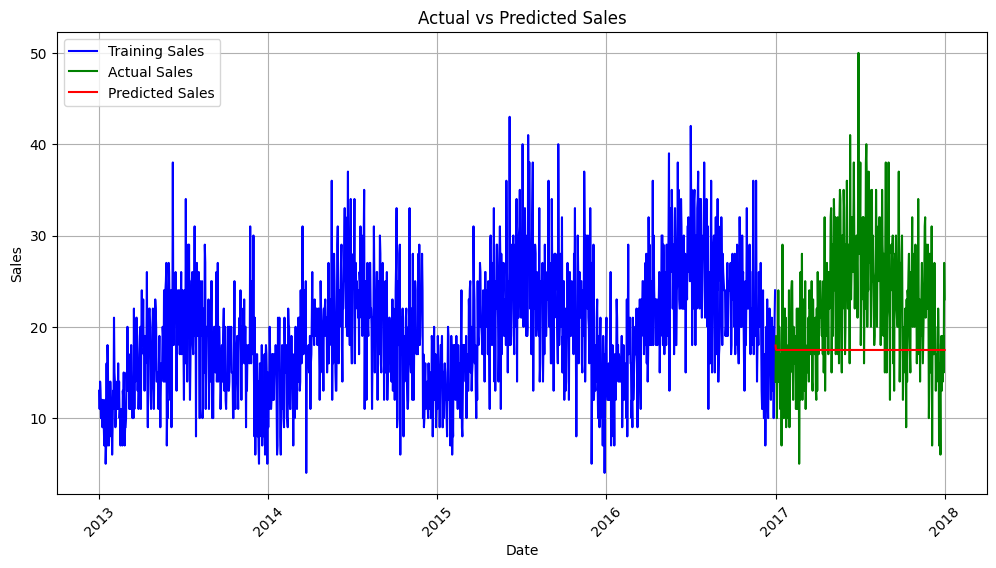

In [16]:
# Step 10: Visualize Actual vs. Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['sales'], label='Training Sales', color='blue')
plt.plot(test.index, test['sales'], label='Actual Sales', color='green')
plt.plot(test.index, test['predicted_sales'], label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **Conclusion**

- The demand forecasting model effectively predicted future sales for various items across different stores.
- Utilizing the ARIMA model allowed us to capture trends and seasonality in the sales data, improving forecasting accuracy.
- The analysis highlighted key sales patterns, aiding in better inventory management and resource allocation.
- Implementing accurate demand forecasting can enhance customer satisfaction by ensuring product availability while minimizing excess inventory.
- Future work could involve integrating additional factors such as promotions, holidays, or economic indicators to further refine the forecasting model.